[All Age Face Dataset Information](https://github.com/JingchunCheng/All-Age-Faces-Dataset#:~:text=The%20All%2DAge%2DFaces%20(,%2C%20and%20aligned%20faces%20%2C%20respectively.)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import glob
import numpy as np
import ast
import seaborn as sns

In [2]:
!pwd

/home/anhduy/face-attributes/notebooks


In [17]:
DATA_PATH = '/home/Data/All_Age_Faces/'

RAW = os.path.join(DATA_PATH, 'raw/UTKface_inthewild')
CSV = os.path.join(DATA_PATH, 'processed')
CROPPED = os.path.join(DATA_PATH, 'interim')

In [18]:
csv_1 = os.path.join(CSV, 'train.csv')
csv_2 = os.path.join(CSV, 'val.csv')

cropped_1 = os.path.join(CROPPED, 'cropped/')

In [19]:
df_1 = pd.read_csv(csv_1)
df_2 = pd.read_csv(csv_2)

In [20]:
df_aaf = pd.concat([df_1, df_2])
df_aaf.reset_index(drop=True, inplace=True)

df_aaf['file_name'] = df_aaf['file_name'].apply(lambda x: os.path.join(cropped_1, x))

In [21]:
df_aaf

,file_name,age,gender,x_min,y_min,x_max,y_max,land_mark,confidence
0,/home/Data/All_Age_Faces/interim/cropped/00000...,2,0,0.167365,0.295219,0.720185,0.878887,"[0.298828125,0.544921875,0.40234375,0.31835937...",0.999640
1,/home/Data/All_Age_Faces/interim/cropped/00002...,2,0,0.168234,0.193534,0.721805,0.816110,"[0.3046875,0.55078125,0.384765625,0.298828125,...",0.999678
2,/home/Data/All_Age_Faces/interim/cropped/00004...,2,0,0.174054,0.305753,0.717401,0.864044,"[0.3203125,0.5703125,0.43359375,0.3359375,0.51...",0.999237
3,/home/Data/All_Age_Faces/interim/cropped/00006...,2,0,0.198982,0.224097,0.736027,0.814861,"[0.326171875,0.5625,0.40625,0.318359375,0.5039...",0.999857
4,/home/Data/All_Age_Faces/interim/cropped/00008...,2,0,0.192719,0.289039,0.678246,0.899271,"[0.326171875,0.544921875,0.421875,0.31640625,0...",0.999628
...,...,...,...,...,...,...,...,...,...
13093,/home/Data/All_Age_Faces/interim/cropped/13312...,80,1,0.118668,0.194258,0.644668,0.912503,"[0.3359375,0.5546875,0.47265625,0.318359375,0....",0.999345
13094,/home/Data/All_Age_Faces/interim/cropped/13314...,80,1,0.228063,0.219794,0.684340,0.798622,"[0.31640625,0.525390625,0.412109375,0.359375,0...",0.999326
13095,/home/Data/All_Age_Faces/interim/cropped/13316...,80,1,0.238471,0.297687,0.707328,0.906286,"[0.330078125,0.544921875,0.416015625,0.3574218...",0.998989
13096,/home/Data/All_Age_Faces/interim/cropped/13318...,80,1,0.128803,0.270667,0.673211,0.935638,"[0.328125,0.572265625,0.48046875,0.341796875,0...",0.999477


In [28]:
print(f'Total number of images {df_aaf.shape[0]} images')

Total number of images 13098 images


In [22]:
df_aaf = df_aaf[~df_aaf.isin([np.nan, np.inf, -np.inf]).any(1)]

In [23]:
def visualize_batch(image_ids, features):
    plt.figure(figsize=(16, 12))
    
    for ind, (image_id, label) in enumerate(zip(image_ids, features)):
        plt.subplot(3, 3, ind + 1)
        image = cv2.imread(os.path.join(CROPPED, image_id))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(image)
        plt.title(f"Age: {label[0]}, Gender: {'Male' if int(label[1]) == 1 else 'Female'}", fontsize=12)
        plt.axis("off")
    
    plt.show()

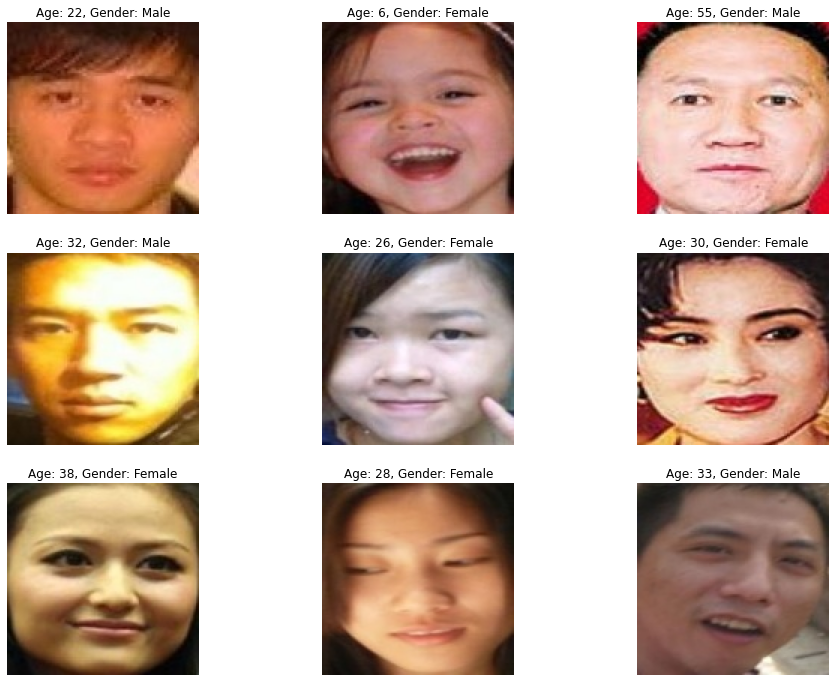

In [25]:
indexs = np.random.choice(df_aaf.shape[0], size = 9, replace = False)

tmp_df = df_aaf.iloc[indexs]
image_ids = tmp_df["file_name"].values
labels = tmp_df[['age', 'gender']].values

visualize_batch(image_ids, labels)

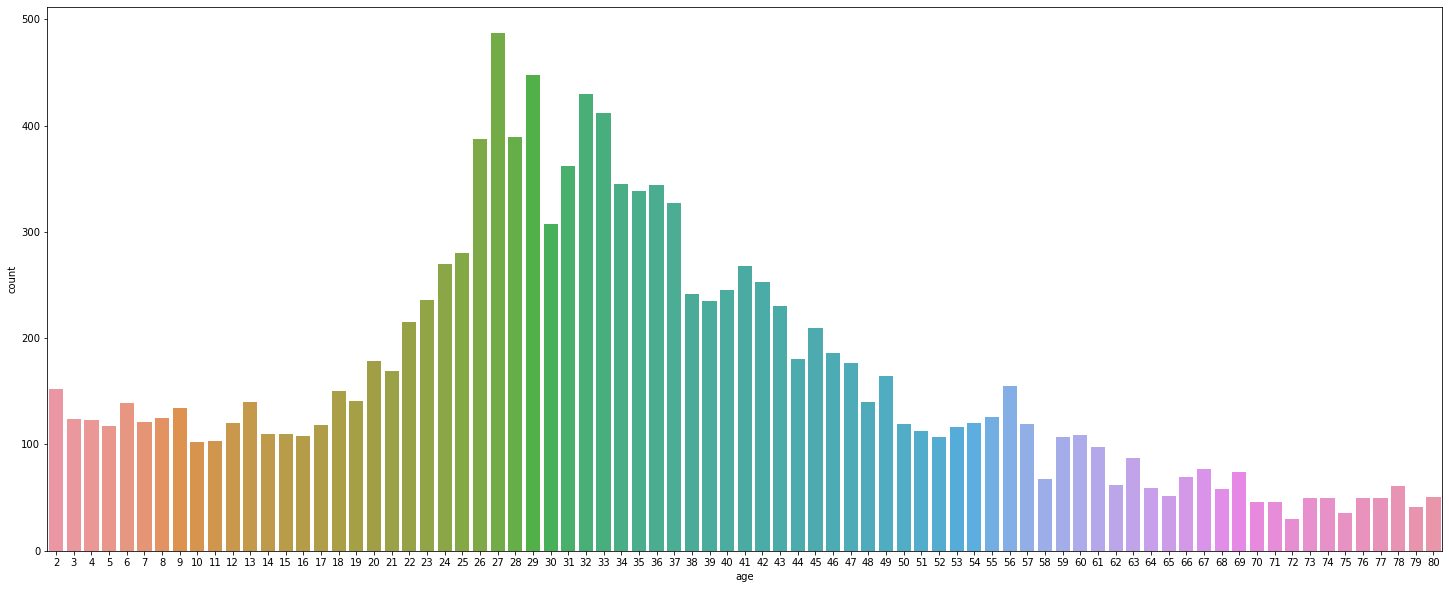

In [26]:
plt.figure(figsize=(25, 10))
sns.countplot(x="age", data=df_aaf);

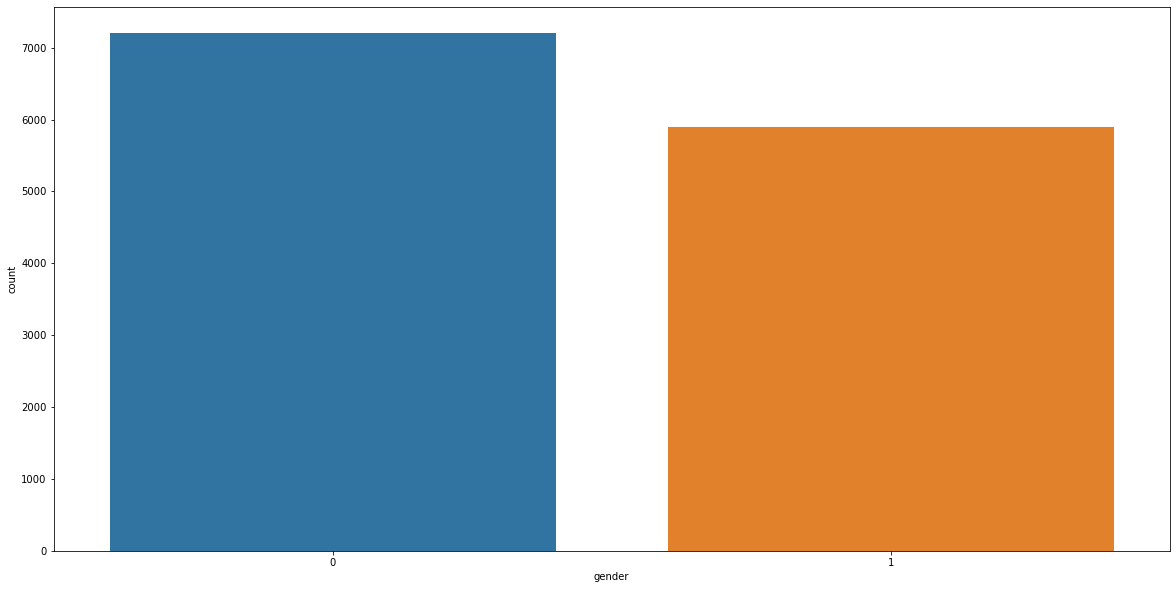

In [27]:
plt.figure(figsize=(20, 10))
sns.countplot(x="gender", data=df_aaf);